In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from AutoEncoderCNN import AE_CNN
from GridSearch import GridSearch

# dont update weights for the encoder on the first classification phase
# shuffle after epochs

In [2]:
# hyperparams and early stopping patience
EPOCHS = [1000]
LR = [0.00001]
WEIGHT_DECAY = [1e-5]
BATCH_SIZE = [4]
FIRST_DIM = [64]
ENCODE_DIM = [128]
patience = 20

# setting the correct device to train on
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# creating the grid search object
GS = GridSearch( 
       device,
       early_stop_depth = patience,
       epochs=EPOCHS,
       learning_rate=LR,
       weight_decay=WEIGHT_DECAY,
       batch_size = BATCH_SIZE,
       first_dim = FIRST_DIM,
       encode_dim = ENCODE_DIM,
       verbose = 1)

In [3]:
GS.search() # running grid search 
GS.save_dicts() # saving the info from GS

Starting search with 1 combinations and a early stopping patience of: 20

---Count: 0, Epochs: 1000, Weight_Decay: 1e-05, Learning_Rate: 1e-05, Batch_Size: 4, First Dim: 64, Encode Dim: 128---


Epoch: 1 | Loss: 0.3613


Epoch: 2 | Loss: 0.3587


Epoch: 3 | Loss: 0.2965


Epoch: 4 | Loss: 0.3392


Epoch: 5 | Loss: 0.2872


Epoch: 6 | Loss: 0.2489


Epoch: 7 | Loss: 0.2084


Epoch: 8 | Loss: 0.3133


Epoch: 9 | Loss: 0.2340


Epoch: 10 | Loss: 0.2485


Epoch: 11 | Loss: 0.2284


Epoch: 12 | Loss: 0.2554


Epoch: 13 | Loss: 0.2389


Epoch: 14 | Loss: 0.2316


Epoch: 15 | Loss: 0.1574


Epoch: 16 | Loss: 0.3030


Epoch: 17 | Loss: 0.2579


Epoch: 18 | Loss: 0.2395


Epoch: 19 | Loss: 0.1962


Epoch: 20 | Loss: 0.2905


Epoch: 21 | Loss: 0.2664


Epoch: 22 | Loss: 0.2716


Epoch: 23 | Loss: 0.2149


Epoch: 24 | Loss: 0.2321


Epoch: 25 | Loss: 0.1820


Epoch: 26 | Loss: 0.2890


Epoch: 27 | Loss: 0.2689


Epoch: 28 | Loss: 0.1863


Epoch: 29 | Loss: 0.1864


Epoch: 30 | Loss: 0.2072


Epoc

In [4]:
# creating and untrained model of the best dimensionality found by GS
model = AE_CNN(64, 128).to(device)

model.load_state_dict(torch.load('./models/model_gs.pth')) # loading best model state
model.load_state_dict(torch.load('./models/Copy Models/model_gs_3-28-2024.pth'))

# setting the encoder and decoder for visualization
encoder = model.encoder
decoder = model.decoder

In [6]:
# input and output arrays
auto_encoder_output = []
encoded_imgs_arr = []
decoded_imgs_arr = []
img_set = GS._val_set # test_set

for x in range(len(img_set)):
    with torch.no_grad():
        inp = img_set.__getitem__(x)[0].to(device)
        
        encoded_imgs = encoder(inp)
        encoded_imgs_arr.append(encoded_imgs)
        
        decoded_imgs = decoder(encoded_imgs)
        decoded_imgs_arr.append((inp, decoded_imgs))
        
        auto_encoder_output.append((inp, model(inp)))

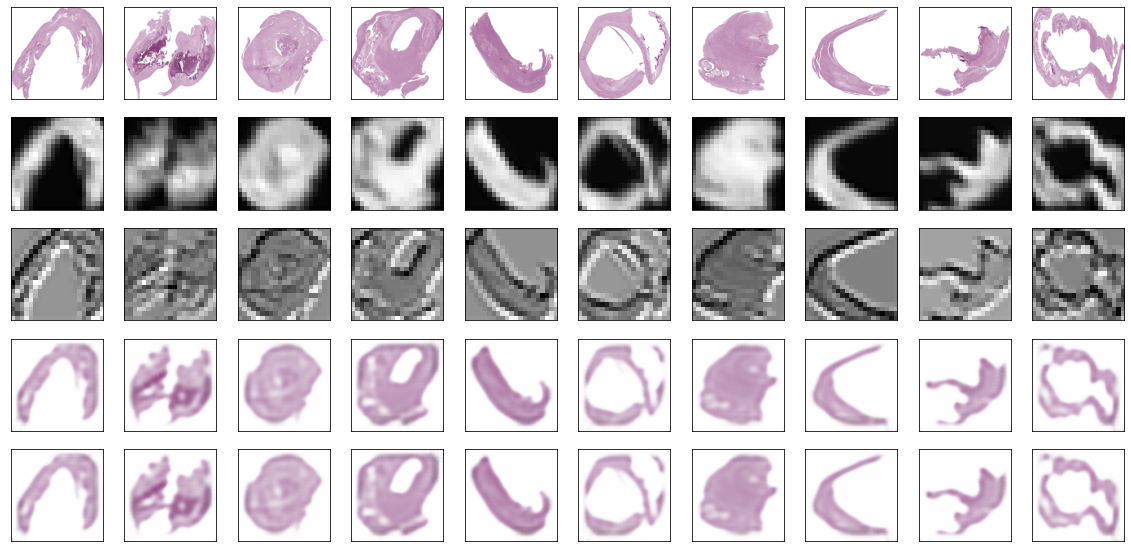

In [11]:
amt = 10
cols = 10
plt.figure(figsize=(20,20))


for k in range(amt):
    
    # input image
    ax = plt.subplot(cols, amt, k+1)
    img = decoded_imgs_arr[k][0]
    img = img.detach().cpu().numpy()
    plt.imshow(np.transpose(img, (1,2,0))) # changes to rgb
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Compressed states
    ax = plt.subplot(cols,amt, k+1+amt)
    plt.gray()
    img = encoded_imgs_arr[k].detach().cpu().numpy()
    conv_filter = 0 # [0, 128)
    plt.imshow(np.transpose(img, (1,2,0))[:,:,conv_filter]) 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(cols,amt, k+1+2*amt)
    plt.gray()
    conv_filter = 125 # [0, 128)
    plt.imshow(np.transpose(img, (1,2,0))[:,:,conv_filter]) 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Output States
    ax = plt.subplot(cols,amt, k+1+3*amt)
    recon = decoded_imgs_arr[k][1]
    recon = recon.detach().cpu().numpy()
    plt.imshow(np.transpose(recon, (1,2,0)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(cols,amt, k+1+4*amt)
    recon = auto_encoder_output[k][1]
    recon = recon.detach().cpu().numpy()
    plt.imshow(np.transpose(recon, (1,2,0)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [10]:
21 * 21 * 128 # compress to 2^20, 2^10 ... 

56448

In [9]:
299*299*3

268203

In [10]:
56448/268203

0.21046744443574456